In [39]:
## Check the licenses and importing functions
import arcpy
arcpy.CheckOutExtension('Spatial')
arcpy.CheckOutExtension('ImageAnalyst')
from arcpy.sa import *
from arcpy.ia import *


In [ ]:
## set the workspace
arcpy.env.workspace=r"E:\teaching\materials\python scripting arcgis\Ex10"


In [ ]:
### Check the available raster datasets in a workspace
import arcpy
walk = arcpy.da.Walk()
for file in walk:
    print(file)

In [ ]:
## Reading a raster to a Raster object

elev = Raster('elevation')
elev

In [ ]:
## display the elevation with color
arcpy.Render (elev, colormap="Elevation #10")

In [ ]:
## Reading raster object properties 

for property in dir(elev):
    if "_" not in property:
        print(f"{property},\n")

In [ ]:
## Get the nubmer of pixels in the raster
print(elev.height,elev.width)

In [ ]:
## Get the raster info using geRasterInfo()
elev_info = elev.getRasterInfo()
# for property in dir(elev_info):
#     if "_" not in property:
#         print(f"{property},\n")
print(elev_info.getCellSize())
print(elev_info.toJSONString())

In [ ]:
### Use json to show all raster info

import json
print(json.dumps(json.loads(elev_info.toJSONString()),indent=2))

In [ ]:
import arcpy
from arcpy import env
env.workspace = r"E:\teaching\materials\python scripting arcgis\Ex10"
raster = arcpy.Raster("tm.img")
print(raster.catalogPath)
desc = arcpy.da.Describe(raster)
print(desc["children"][0]["meanCellHeight"])
for rband in desc["children"]:
    print(rband["name"])

In [ ]:
raster.height
print(raster.noDataValue)

In [ ]:
r_information = raster.getRasterInfo()
print(dir(r_information))
newRaster = arcpy.Raster(r_information)

In [82]:
#Raster calculator
print(arcpy.Raster('tm.img').bandNames)
band3 = arcpy.Raster('tm.img/Layer_3')
band1 = arcpy.Raster('tm.img/Layer_1')
bandratio = band3 / band1
bandratio.save('bandradio.img')

['Layer_1', 'Layer_2', 'Layer_3']


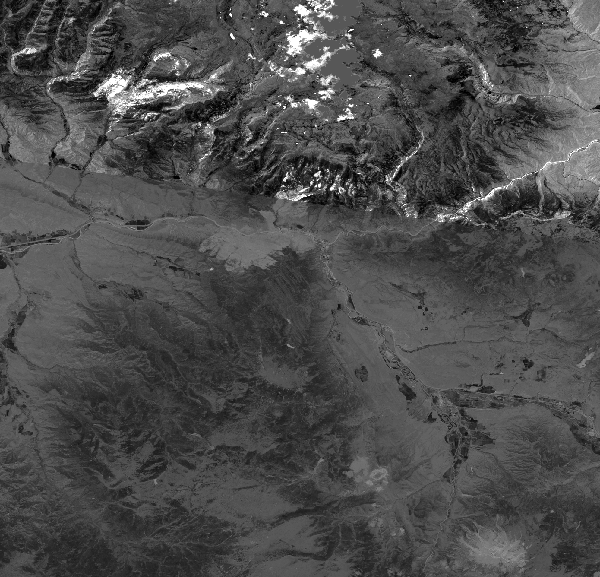

In [83]:
bandratio

In [ ]:
elev = arcpy.Raster("elevation")
arcpy.Render (elev, colormap="Elevation #1")

In [ ]:
from arcpy.sa import *
from arcpy.ia import *
elev_clip = Clip(elev, "watershed_HUC12")
elev_clip

In [67]:
elev.save('clipped_elev')

In [23]:
import arcpy
from arcpy import env
rastername ="tm.img"
rdesc = arcpy.da.Describe(rastername)

In [ ]:
tm_raster = arcpy.Raster(rastername)
tm_raster.bandNames

## Get basic information about the raster data

### Print the raster information by the da.Describe function

In [ ]:
import arcpy
from arcpy import env
rastername ="tm.img"
rdesc = arcpy.da.Describe(rastername)
for key,item in rdesc.items():
    print(key,item)

    

#### Read raster bands

In [ ]:
tm_raster = arcpy.Raster(rastername)

for bandname in tm_raster.bandNames:

    band = arcpy.Raster(rastername + "/" + bandname)
    print(band.getStatistics())

### A comprehensive code to create maximum downslope values from an elevation model

In [69]:
# This script calculates the maximumm downslope for the raster cells 
import numpy as np
import arcpy
from arcpy.sa import Raster, RasterCellIterator
# read the elevation model
dem = Raster("elevation")
arcpy.env.overwriteOutput = True

#get knowledge about the input raster
raster_info = dem.getRasterInfo()
cell_x = dem.meanCellWidth
cell_y = dem.meanCellHeight

# change the raster info so the output type is float 32bit
raster_info.setPixelType("F32")
#create a new raster based on the raster info
new_slope = Raster(raster_info)
#update the raster using cell iterator
with RasterCellIterator({'rasters':[dem,new_slope]}) as rci:
    for r, c in rci:
        ## Get a list of slopes in the 8 neighbors
        slopes = []
        for x,y in [(-1,1),(-1,0),(-1,-1), (0,1),(0,-11),(1,-1),(1,1),(1,0)]:
            #check if the elevation is larger than the neighbor
            if dem[r,c] >= dem[r+x, c+y]:
                slope = abs(dem[r,c]- dem[r+x, c+y]) / np.sqrt((x*cell_x)**2 + (y*cell_y)**2)
                slopes.append(slope)
        if len(slopes) != 0:
            new_slope[r,c] = max(slopes)
        else:
            new_slope[r,c] = 0 #0 is undetermined
new_slope.save('new_slope')

In [ ]:
Render(new_slope,colormap="Elevation #10")